In [8]:
import keras
from keras import layers

from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


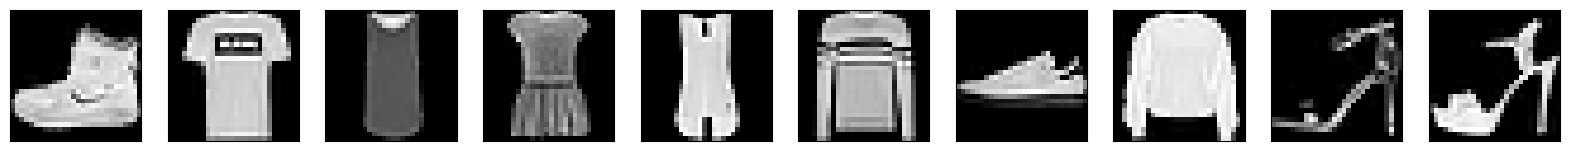

In [14]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [15]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(64, activation='relu')(input)
mean = layers.Dense(2)(encoded)
sigma = layers.Dense(2)(encoded)

In [16]:
def sampling(args):
    mean, sigma = args
    epsi = K.random_normal(shape=(K.shape(mean)[0], 2), mean=0.0, stddev=1.0)
    return mean + K.exp(sigma)*epsi

z = layers.Lambda(sampling)([mean, sigma])
    
    

In [17]:
encoder = keras.Model(input, [mean, sigma, z], name='encoder')

In [20]:
encoded_inputs = keras.Input(shape=(2,))
decoded = layers.Dense(64, activation='relu')(encoded_inputs)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

decoder = keras.Model(encoded_inputs, decoded, name='decoder')
v_autoencoder = keras.Model(input, decoder(encoder(input)[2]), name='variational_autoencoder')

In [21]:
x_train=x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test=x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

In [22]:
x_train.shape

(60000, 784)

In [24]:
r_loss = keras.losses.binary_crossentropy(input, decoded)
r_loss *=784
kl_loss = 

In [23]:
v_autoencoder.fit(x_train, x_train, batch_size=256, epochs=50, validation_data=(x_test, x_test))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.